In [62]:
# Initialize Otter
import otter
grader = otter.Notebook("lab11.ipynb")

In [63]:
#Import packages
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline 

import numpy as np
import pandas as pd
from matplotlib import patches

<table style="width: 100%;">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, Fall 2024<br>
            Peter F. Grinde-Hollevik<br>
            Ray Zhou<br>
            Dr. Eric Van Dusen<br>
            Dr. Daniel Hammer<br>
            Rohan Jha<br>
            Yiyang Chen <br>
            Akhil Venkatesh <br>
        </p></td></tr>
</table>

   # Lab 11: Constructing the MAC Curve for Methane

Please refer to the "Marginal Abatement Cost Curves" chapter for a thorough introduction to abatement curves. This lab is an empirical application of what was covered in class. In this lab, we shall attempt to produce our very own Marginal Abatement Cost (MAC) Curve based on real world data!

For this lab, we'll rely on a dataset published by the International Energy Association for methane emissions from the oil and gas sector. One important thing to keep in mind is that Methane is far more powerful than CO2 in trapping heat in the atmosphere; *80 times more potent in the first 20 years and 20 times more powerful when average over 100 years*. Methane emissions from the energy sector contribute a third of all human caused methane emissions.  

**The dataset and documentation are from**: 
- IEA Global Methane Tracker (2023) (https://www.iea.org/data-and-statistics/data-tools/methane-tracker-data-explorer)
- Documentation (https://iea.blob.core.windows.net/assets/48ea967f-ff56-40c6-a85d-29294357d1f1/GlobalMethaneTracker_Documentation.pdf)

However, we have cleaned the data a little bit (selected certain values, renamed/dropped certain columns) so it's easier to work with for the purpose of this lab.

### The MAC Curve

Before attempting to replicate the MAC curve, let's review the information it holds.

**Question 1:** What do the X and Y axes of a MAC curve represent?

a. x-axis: abatement potential of each technology,  y-axis: marginal or abatement cost of each technology. <br>
b. x-axis: investment potential of each technology (a different technology per rectangle), y-axis: abatement cost of each technology. <br>
c. x-axis: popularity of each technology (a different technology per rectangle), y-axis: environmental cost of each technology. <br>
d. x-axis: carbon footprint reduction of each technology, y-axis: energy efficiency of each technology. <br>


In [64]:
q1 = 'a'

In [65]:
grader.check("q1")

q1 results: All test cases passed!

**Question 2:** Why does the Y-axis include negative values?

a. Some abatement technologies' values are negative because they actually lose money and the implementation of
them would incur marginal costs. These are technologies that would lose us money, but
reduce emissions. <br>
b. Some abatement technologies' values are negative because they actually save money and the implementation of
them would not incur any marginal costs. These are technologies that would save us money, as well as
reduce emissions. <br>
c. Some abatement technologies' values are negative because they actually save money and the implementation of
them would not incur any marginal costs. These are technologies that would save us money, though not
reduce emissions. <br>
d. Some abatement technologies' values are positive because they actually save money and the implementation of
them would not incur any marginal costs. These are technologies that would save us money, as well as
reduce emissions. <br>


In [66]:
q2 = 'b'

In [67]:
grader.check("q2")

q2 results: All test cases passed!

**Question 3:** (True or False) The Emissions Abatement alternative would promote a greater reduction in GHGs because the investment in
environmentally-friendly practices (especially technologies in the MAC with wide widths) decreases the
amount of overall greenhouse gas emissions. Compared to the Business-as-Usual approach, as time goes
on, the Emissions Abatement alternatives would become wider and shorter (from thinner and taller), making it
more economical and environmentally-friendly to not continue with the BAU alternative.

a. True <br>
b. False <br>

In [68]:
q3 = 'a'

In [69]:
grader.check("q3")

q3 results: All test cases passed!

Let's first try to construct a MAC for all abatement technologies in the Asia Pacific region. We'll start by importing a dataset on methane abatement from the International Environmental Agency (IEA). 

In [70]:
abatement_table = Table.read_table("abatement_data.csv")
abatement_table

Country,Region,Type (Oil/Gas),Production Source,Segment (Up/Down),Abatement Technology,Abatement Potential,Abatement Cost
Japan,Asia Pacific,Gas,Onshore conventional gas,Upstream,Other,0.03,-11.11
Korea,Asia Pacific,Gas,Offshore gas,Upstream,Replace pumps,0,-10.69
Korea,Asia Pacific,Gas,Onshore conventional gas,Upstream,Replace pumps,0,-10.69
Korea,Asia Pacific,Gas,Unconventional gas,Upstream,Replace pumps,0,-10.69
Japan,Asia Pacific,Gas,Onshore conventional gas,Upstream,Replace pumps,0.32,-10.56
Japan,Asia Pacific,Oil,Onshore conventional oil,Upstream,Blowdown capture,0,-10.53
Korea,Asia Pacific,Oil,Offshore oil,Upstream,Blowdown capture,0,-10.53
Korea,Asia Pacific,Oil,Offshore oil,Upstream,Replace with instrument air systems,0.25,-10.21
Japan,Asia Pacific,Oil,Offshore oil,Upstream,Replace with instrument air systems,0.02,-10.19
Japan,Asia Pacific,Gas,Downstream gas,Downstream,Replace with instrument air systems,1.33,-10.19


**Question  4:**  The second column in the table is `Region`. To begin with, let's select the Asia Pacific region, accounting for approximately 1/4 of all emissions. In the cell below, please select all the rows in `abatement_table` where the region is the Asia Pacific and save this new table to `abatement_table_ap`. Please make sure you don't change the original `abatement_table` by accident.

In [71]:
abatement_table_ap = abatement_table.where('Region', 'Asia Pacific')
abatement_table_ap

Country,Region,Type (Oil/Gas),Production Source,Segment (Up/Down),Abatement Technology,Abatement Potential,Abatement Cost
Japan,Asia Pacific,Gas,Onshore conventional gas,Upstream,Other,0.03,-11.11
Korea,Asia Pacific,Gas,Offshore gas,Upstream,Replace pumps,0,-10.69
Korea,Asia Pacific,Gas,Onshore conventional gas,Upstream,Replace pumps,0,-10.69
Korea,Asia Pacific,Gas,Unconventional gas,Upstream,Replace pumps,0,-10.69
Japan,Asia Pacific,Gas,Onshore conventional gas,Upstream,Replace pumps,0.32,-10.56
Japan,Asia Pacific,Oil,Onshore conventional oil,Upstream,Blowdown capture,0,-10.53
Korea,Asia Pacific,Oil,Offshore oil,Upstream,Blowdown capture,0,-10.53
Korea,Asia Pacific,Oil,Offshore oil,Upstream,Replace with instrument air systems,0.25,-10.21
Japan,Asia Pacific,Oil,Offshore oil,Upstream,Replace with instrument air systems,0.02,-10.19
Japan,Asia Pacific,Gas,Downstream gas,Downstream,Replace with instrument air systems,1.33,-10.19


In [72]:
grader.check("q4")

q4 results: All test cases passed!

### Taxes on the MAC Curve

As discussed in class and the textbook, we can use the MAC curve to find the total abatement potential of an excise tax.

**Question 5:** What is an excise tax? Where does it go on a MAC curve?

a. An excise tax is a fixed dollar amount imposed on a type of good. On the marginal abatement cost curve, an excise is a horizontal line in which the x-value equals the value of the excise tax.  <br>
b. An excise tax is a percentage dollar amount imposed on a type of good. On the marginal abatement cost curve, an excise is a horizontal line in which the y-value equals the value of the excise tax. <br>
c. An excise tax is a fixed dollar amount imposed on a type of good. On the marginal abatement cost curve, an excise is a horizontal line in which the y-value equals the value of the excise tax. <br>
d. An excise tax is a percentage dollar amount imposed on a type of good. On the marginal abatement cost curve, an excise is a horizontal line in which the x-value equals the value of the excise tax. <br>


In [73]:
q6 = 'c'

In [74]:
grader.check("q5")

q5 results: All test cases passed!

**Question 6.1:** Calculate the total abatement for a tax of 4 dollars on methane emissions. Do this by first filtering  `abatement_table_ap` to only include the rows where the cost is less than or equal to \$4 and saving this new table to `abatement_cost_4`. Then, set `abatement_at_4` equal to all the abatement potential that will be reduced if this tax was placed. `abatement_at_4` should just be a number (measured in kilotons).

In [75]:
abatement_below_4 = abatement_table_ap.where('Abatement Cost', are.below_or_equal_to(4))
abatement_at_4 = np.sum(abatement_below_4.column('Abatement Potential'))
abatement_at_4


6342.369999999999

In [76]:
grader.check("q6_1")

q6_1 results: All test cases passed!

**Question 6.2:** Define a function named `total_abatement` that takes in a tax level and does the same procedure as above to calculate the total abatement.

In [77]:
def total_abatement(tax_level):
    abatement_below_tax_level = abatement_table.where('Abatement Cost', are.below_or_equal_to(tax_level))
    abatement_at_tax_level = np.sum(abatement_below_tax_level.column('Abatement Potential'))
    return abatement_at_tax_level


In [78]:
grader.check("q6_2")

q6_2 results: All test cases passed!

**Question 7:** In order to create the MAC curve, create a table of abatement technologies using `abatement_table_ap`. The table should contain columns named as `Abatement Cost` and `Cumulative Abatement Potential`. `Abatement Cost` should contain the costs of abatements and it should be sorted in ascending order, while `Cumulative Abatement Potential` should contain the total abatement potential of all technologies below the corresponding abatement cost.


In [79]:
cumulative_potential_abatement_array = np.cumsum(abatement_table_ap.column('Abatement Potential'))
abatement_table_with_cumulative = abatement_table_ap.with_column('Cumulative Abatement Potential', cumulative_potential_abatement_array)
abatement_cumulative_sorted = abatement_table_with_cumulative.sort('Abatement Cost')
abatement_cumulative_sorted

Country,Region,Type (Oil/Gas),Production Source,Segment (Up/Down),Abatement Technology,Abatement Potential,Abatement Cost,Cumulative Abatement Potential
Japan,Asia Pacific,Gas,Onshore conventional gas,Upstream,Other,0.03,-11.11,0.03
Korea,Asia Pacific,Gas,Offshore gas,Upstream,Replace pumps,0,-10.69,0.03
Korea,Asia Pacific,Gas,Onshore conventional gas,Upstream,Replace pumps,0,-10.69,0.03
Korea,Asia Pacific,Gas,Unconventional gas,Upstream,Replace pumps,0,-10.69,0.03
Japan,Asia Pacific,Gas,Onshore conventional gas,Upstream,Replace pumps,0.32,-10.56,0.35
Japan,Asia Pacific,Oil,Onshore conventional oil,Upstream,Blowdown capture,0,-10.53,0.35
Korea,Asia Pacific,Oil,Offshore oil,Upstream,Blowdown capture,0,-10.53,0.35
Korea,Asia Pacific,Oil,Offshore oil,Upstream,Replace with instrument air systems,0.25,-10.21,0.6
Japan,Asia Pacific,Oil,Offshore oil,Upstream,Replace with instrument air systems,0.02,-10.19,0.62
Japan,Asia Pacific,Gas,Downstream gas,Downstream,Replace with instrument air systems,1.33,-10.19,1.95


In [80]:
grader.check("q7")

q7 results: All test cases passed!

#### Plotting Functions
Some data manipulations are required to visualize the MAC Curve. For example, the width of the columns has to be the quantity of abatement and the height (positive or negative) has to be the cost. The function below does these manipulations for you.


In [81]:
# HIDDEN
abatement_table_2021 = Table.read_table('abatement_data_2021.csv')
abatement_table_2021
abatement_table_ap_2021 = abatement_table_2021.where('Region', 'Asia Pacific')
abatement_table_ap_2021

Country,Region,Oil Gas,Production source,Upstream Downstream,Reason,Abatement technology,Abatement Potential,Abatement Cost
Japan,Asia Pacific,Gas,Onshore conventional gas,Upstream,Vented,Replace pumps,0.25,-6.2
Japan,Asia Pacific,Oil,Onshore conventional oil,Upstream,Vented,Blowdown capture,0,-6.18
Japan,Asia Pacific,Gas,Offshore gas,Upstream,Vented,Replace with instrument air systems,0.02,-5.84
Japan,Asia Pacific,Oil,Offshore oil,Upstream,Vented,Replace with instrument air systems,0.01,-5.84
Japan,Asia Pacific,Gas,Downstream gas,Downstream,Vented,Replace with instrument air systems,0.62,-5.84
Japan,Asia Pacific,Oil,Offshore oil,Upstream,Vented,Replace compressor seal or rod,0,-5.58
Japan,Asia Pacific,Gas,Offshore gas,Upstream,Vented,Replace compressor seal or rod,0,-5.58
Japan,Asia Pacific,Gas,Onshore conventional gas,Upstream,Vented,Blowdown capture,0.59,-5.57
India,Asia Pacific,Gas,Offshore gas,Upstream,Vented,Replace with instrument air systems,2.75,-5.33
India,Asia Pacific,Gas,Downstream gas,Downstream,Vented,Replace with instrument air systems,0.91,-5.33


In [82]:
# Making columnn widths for the Asia Pacific "_ap" Region
def find_x_pos(widths):
    cumulative_widths = [0]
    cumulative_widths.extend(np.cumsum(widths))
    half_widths = [i/2 for i in widths]
    x_pos = []
    for i in range(0, len(half_widths)):
        x_pos.append(half_widths[i] + cumulative_widths[i])
    return x_pos

#Prepare the data for plotting
width_group = abatement_table_ap_2021.column('Abatement Potential')
height_group = abatement_table_ap_2021.column('Abatement Cost')
new_x_group = find_x_pos(width_group)

### Policy Analysis Tool
Now lets add a tool in to see the effects of a tax. The following function takes in a number `tax` and a table similar to abatement_table_ap, and it outputs how much abatement would be reduced if a tax equal to `tax` was implemented, based on data from the table. For the purposes of this analysis, we will be using data from 2021, as it is more accurate.


In [83]:
def methane_tax(tax, table):
    if tax < min(table.column('Abatement Cost')):
        print("No Abatement")
    else:
        abatement = table.where('Abatement Cost', are.below_or_equal_to(tax))
        total_abatement = sum(abatement.column('Abatement Potential'))
        abatement_technologies = abatement.column('Abatement technology')
        
        print('Total Abatement (kt CH4): ', np.round(total_abatement,2))
        print("")

Note that the conditional statement underneath the def statement checks if the minimum value in the array created
from the 'Abatement Cost' column in table is less than the value of the tax. This means that is the tax is less
than the minimum, there will be no abatement of emissions created from the tax.

### Plotting the MAC Curve with the tax line
The function below takes the methane_tax function and plots all the possible abatement opportunities. Try to understand what each "plt" part does if you're interested!

Methane Tax ($/MBtu): $4
Total Abatement (kt CH4):  4579.4



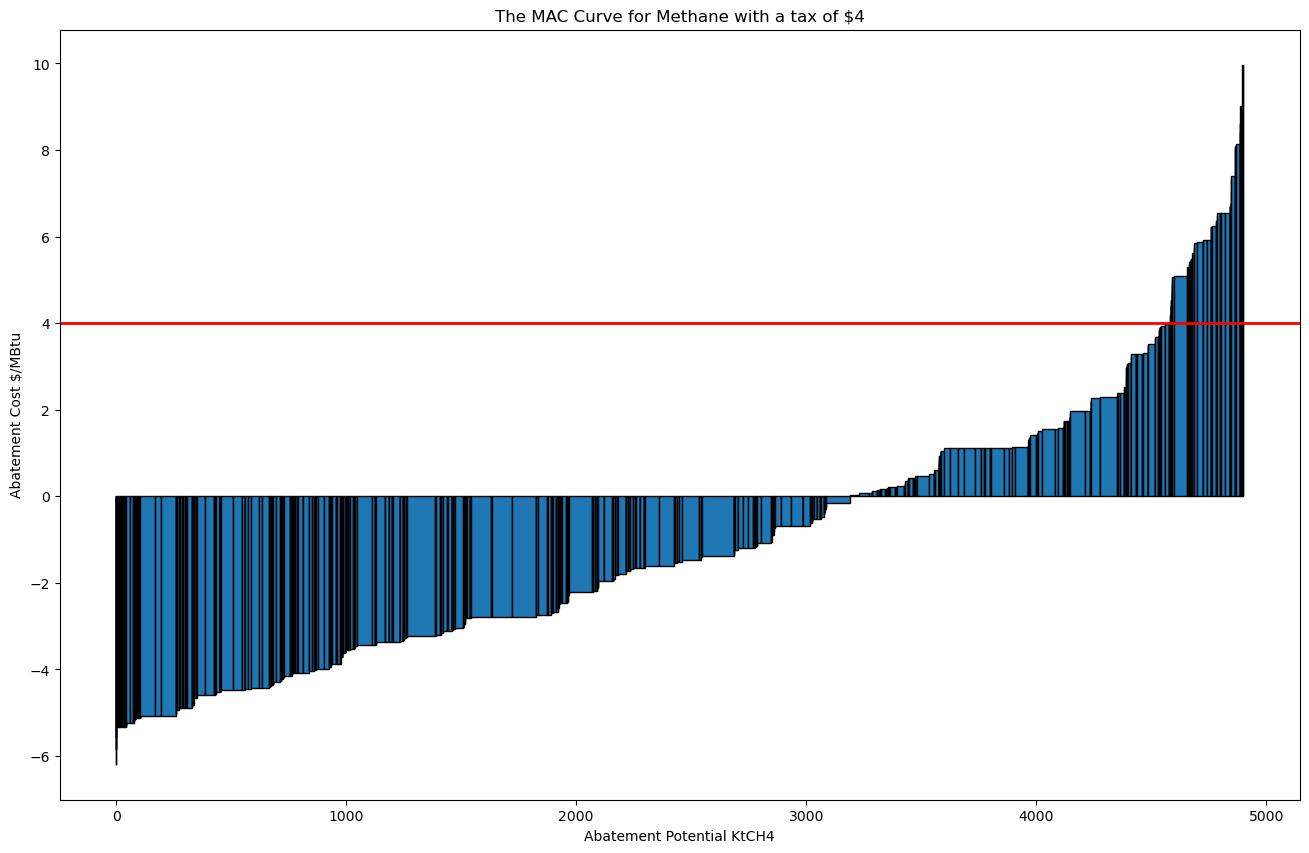

In [84]:
def group_plot(tax):
    print(f"Methane Tax ($/MBtu): ${tax}")
    methane_tax(tax, abatement_table_ap_2021)
    plt.figure(figsize=(16,10))
    plt.bar(new_x_group, height_group,width=width_group,edgecolor = 'black')
    plt.title('The MAC Curve for Methane with a tax of $4')
    plt.xlabel('Abatement Potential KtCH4')
    plt.ylabel('Abatement Cost $/MBtu')
    plt.axhline(y=tax, color='r',linewidth = 2)
    
group_plot(4)

<!-- BEGIN QUESTION -->

**Question 8:** Looking at the curve, what is the relation between the red line and the printed `Total Abatement`?

_It appears the red line intersects the curve where the x-value is equal to the printed Total Abatement._

<!-- END QUESTION -->

This is an applied MAC for Methane emissions in the Asia-Pacific region! Super cool.


Let's make the plot even more instructive by creating a color mapping of the different abatement technologies.
The solution to this is giving each a different color from a Python dictionary. Don't worry if you don't understand the code below!

In [85]:
#Prepare data for plotting (second round)
width = abatement_table_ap_2021.column('Abatement Potential')
height = abatement_table_ap_2021.column('Abatement Cost')
new_x = find_x_pos(width)

#Let's give each type of technology a different color!
abatement_colors_dict = {}
count = 0
colors = ['#EC5F67', '#F29056', '#F9C863', '#99C794', '#5FB3B3', '#6699CC', '#C594C5','#85E827','#F165FD','#1F9F7F','#945CF8','#ff3a1d','#2a8506']
for i in set(abatement_table_ap_2021['Abatement technology']):
    abatement_colors_dict[i] = colors[count]
    count += 1

colors_mapped = list(pd.Series(abatement_table_ap_2021['Abatement technology']).map(abatement_colors_dict))
abatement_table_ap_2 = abatement_table_ap_2021.with_column('Color', colors_mapped)

Methane Tax: $4
Total Abatement (kt CH4):  4579.4



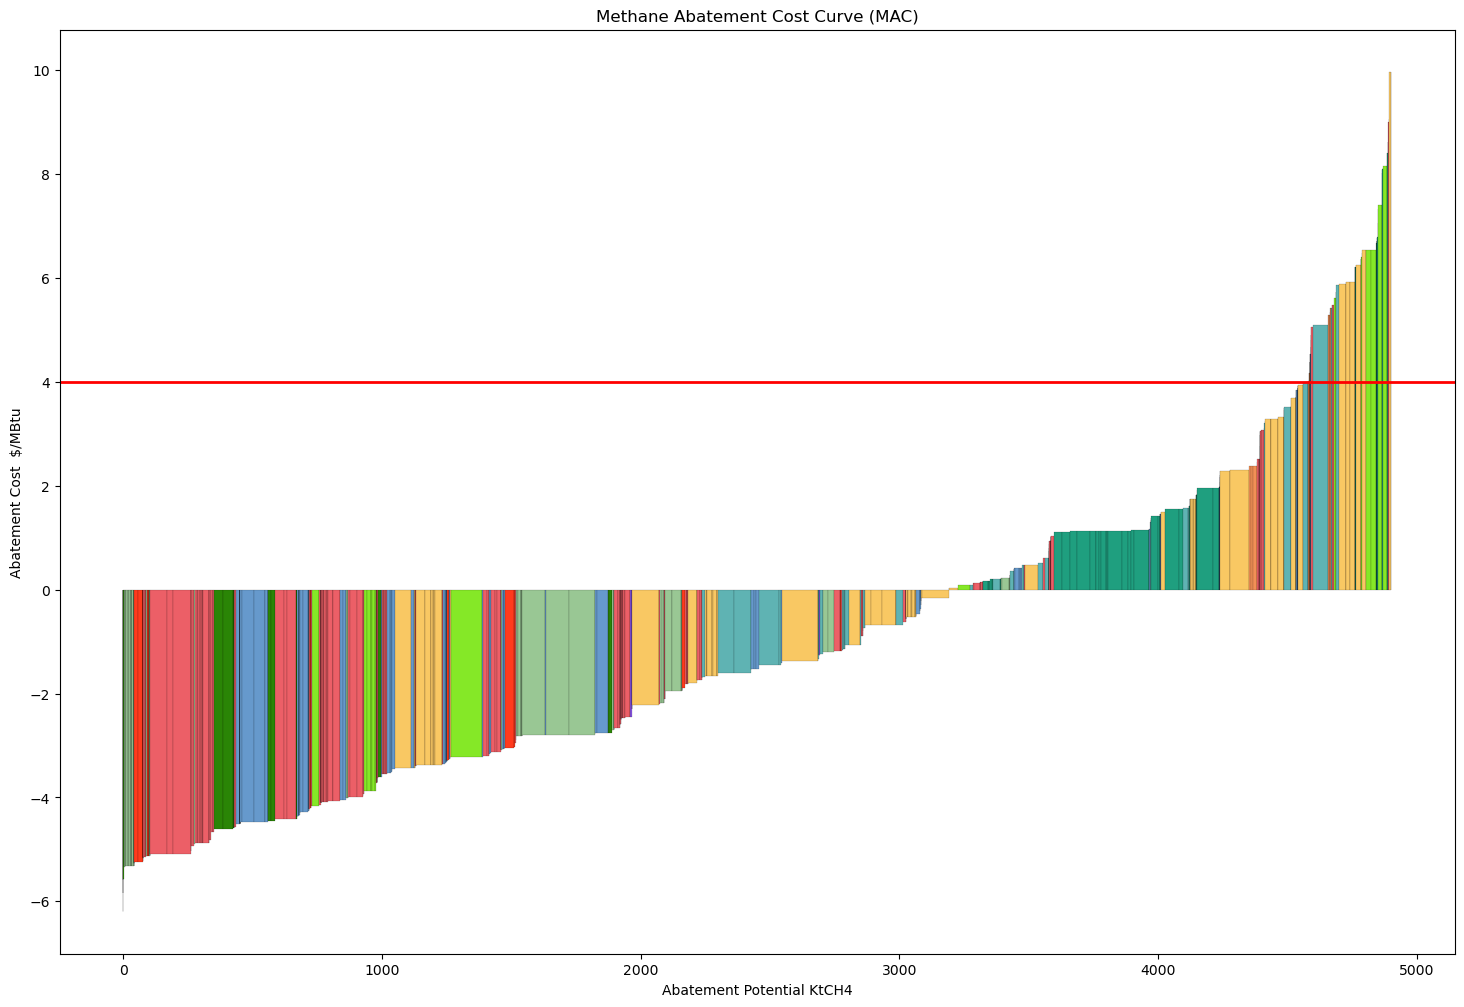

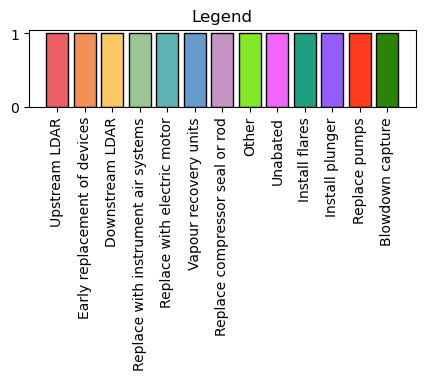

In [86]:
#The Methane curve plot - function!
def mckinsey_curve(tax, abatement_table):
    print(f"Methane Tax: ${tax}")
    methane_tax(tax, abatement_table)
    plt.figure(figsize=(18,12))
    plt.bar(new_x, height, width=width, linewidth=0.1, color=abatement_table['Color'], edgecolor = "black")
    plt.title('Methane Abatement Cost Curve (MAC)')
    plt.xlabel('Abatement Potential KtCH4')
    plt.ylabel('Abatement Cost  $/MBtu')
    plt.axhline(y=tax, color='r', linewidth = 2)

    plt.figure(figsize=(5,1))
    plt.bar(abatement_colors_dict.keys(), 1, color = abatement_colors_dict.values())
    plt.xticks(rotation=90)
    plt.title('Legend')
    
mckinsey_curve(4, abatement_table_ap_2)

Nice Plot! From here, we can differentiate the multiple methane abatement technologies on a cost basis, finding the most efficient ways of reducing methane emissions from gas production.

Looking at the Asia-Pacific Region, we can see that most of the opportunities on this graph have a negative cost - meaning that it makes economic sense to make the technological improvements. We also observe the result of introducing a tax: with a tax of $4 per ton, we expect the total abatement to be almost 4600 tons within this industry. 

However, unfortunately, our analysis is likely flawed as the MAC curve isn't necessarily perfect.

<!-- BEGIN QUESTION -->

**Question 9:** What are two limitations of the MAC? Describe each in 2 sentences or less.

_Generally, the MAC From the MAC does not include capital intensity of certain interventions. The capital intensity calculation does not take future potential savings, but is a solid method to determine which technologies require the largest upfront capital investment. Additionally, the MAC tends to overestimate costs as it does not consider dynamic costs, the potential cost reductions brought by energy transitions. Consequently, decision-makers may be put off certain abatements due to the higher perceived costs._

<!-- END QUESTION -->

We can also repeat the process of constructing a MAC curve, but for North America!

Methane Tax: $4
Total Abatement (kt CH4):  2940.61



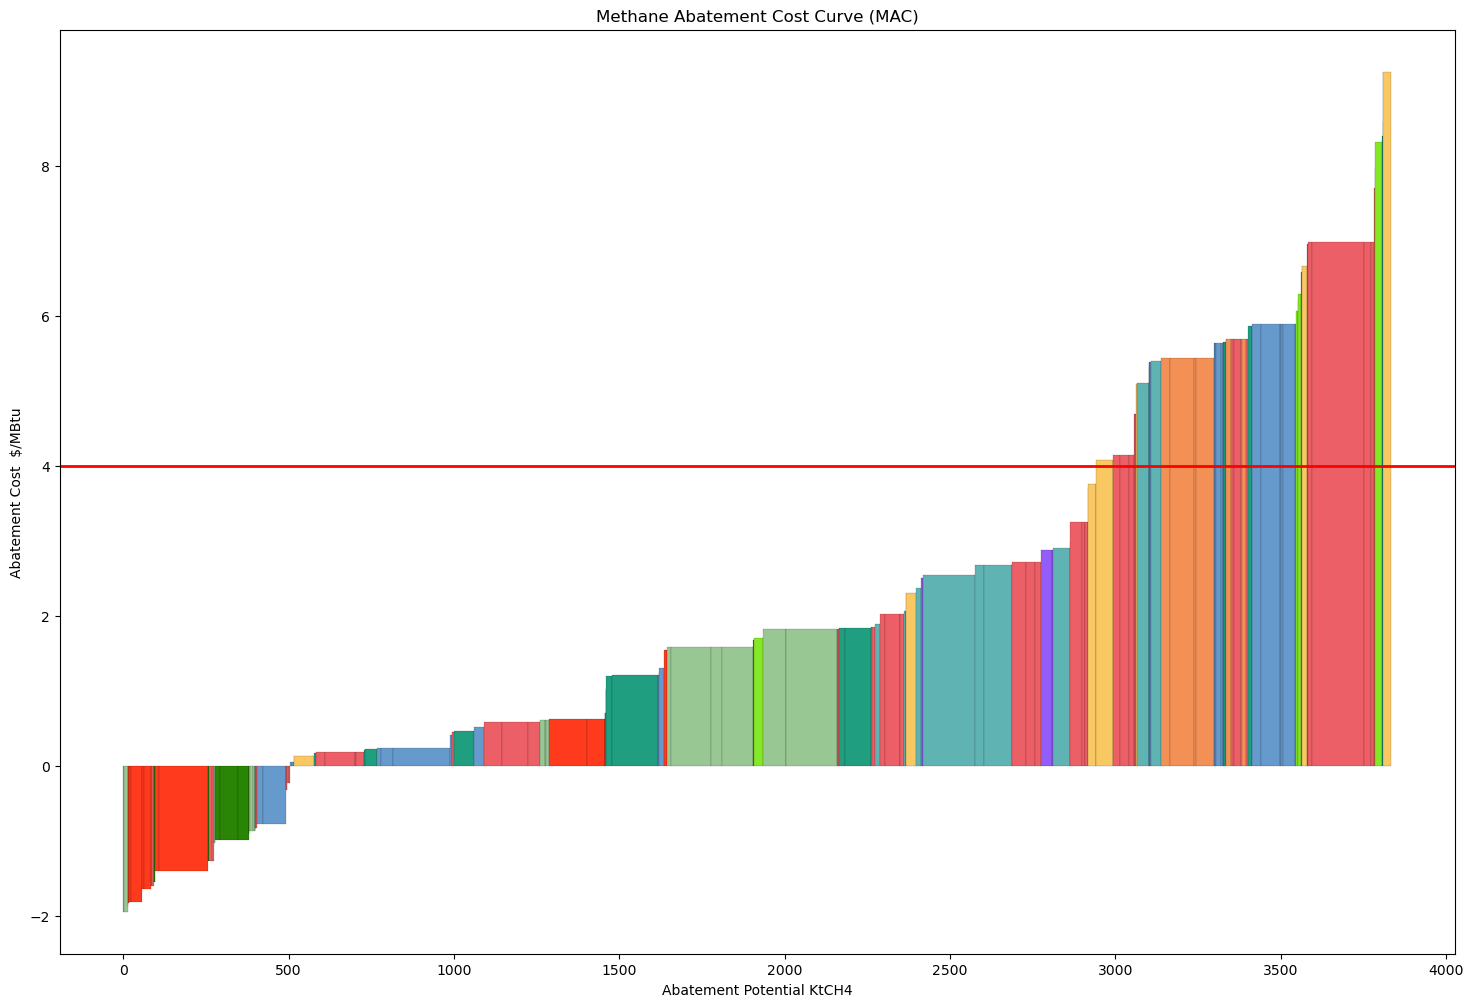

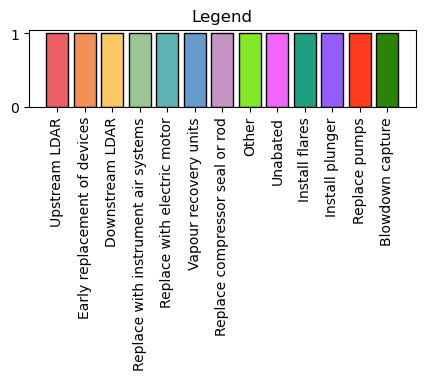

In [87]:
abatement_table_us = abatement_table_2021.where('Region', 'North America')

#Prepare data for plotting (North America. _us)
width = abatement_table_us.column('Abatement Potential')
height = abatement_table_us.column('Abatement Cost') 
new_x = find_x_pos(width)

colors_mapped = list(pd.Series(abatement_table_us['Abatement technology']).map(abatement_colors_dict))
abatement_table_us = abatement_table_us.with_column('Color', colors_mapped)

mckinsey_curve(4, abatement_table_us)

Finally, lets build the MAC Curve for global emissions across all regions.

Methane Tax: $4
Total Abatement (kt CH4):  22191.82



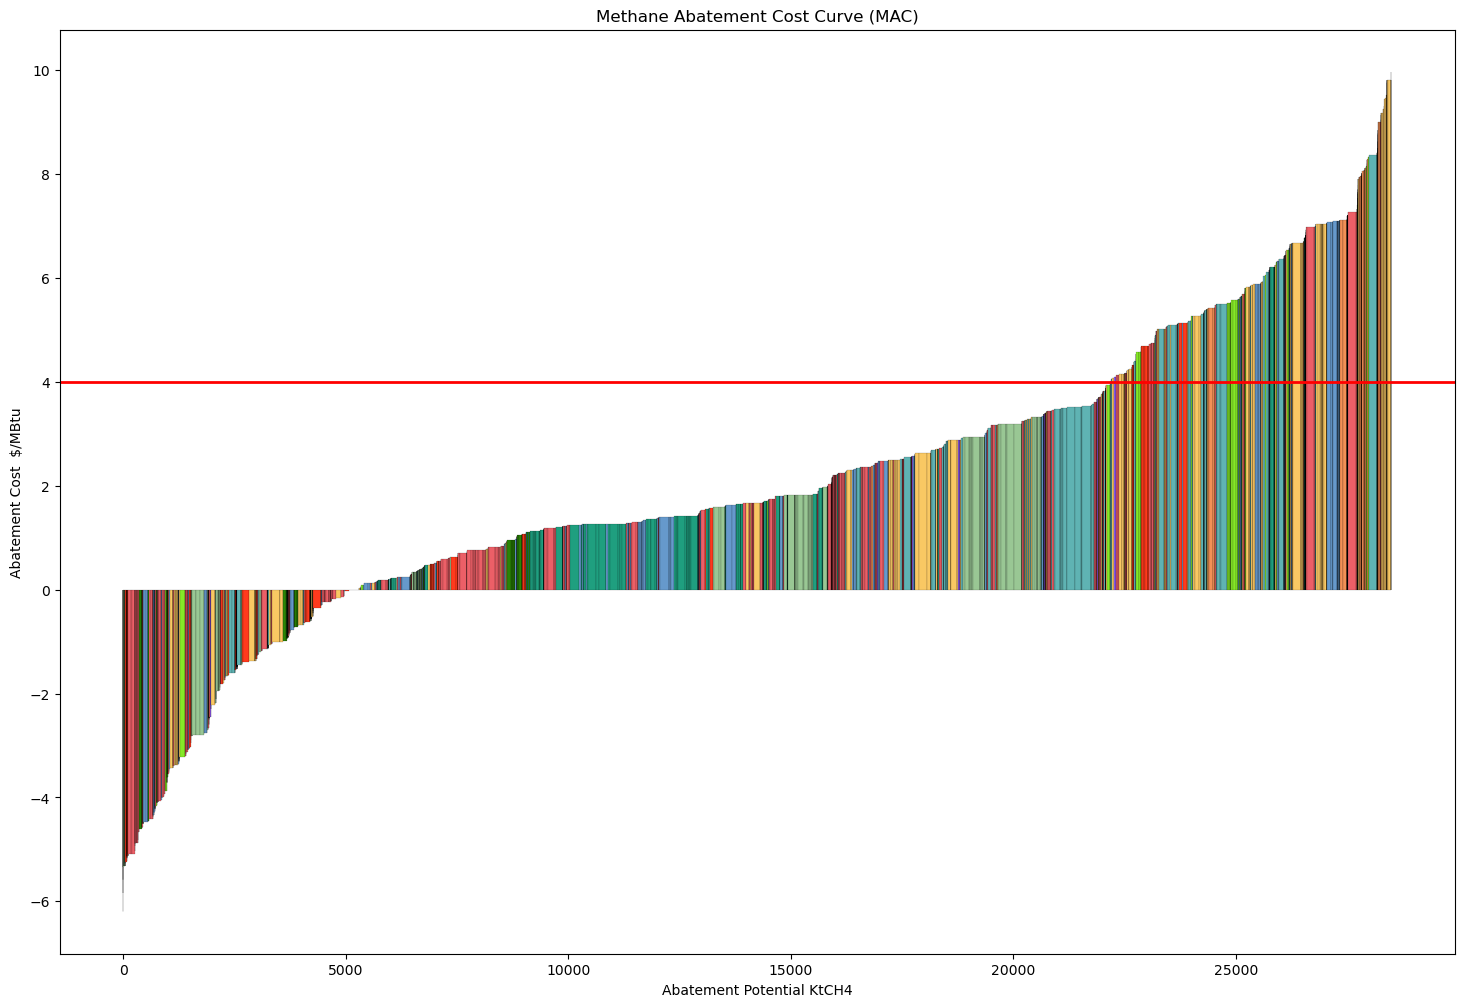

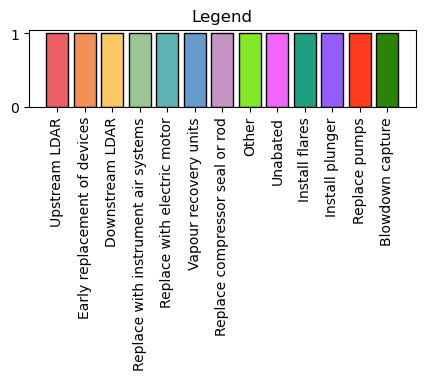

In [88]:
width = abatement_table_2021.column('Abatement Potential')
height = abatement_table_2021.column('Abatement Cost')
new_x = find_x_pos(width)

colors_mapped = list(pd.Series(abatement_table_2021['Abatement technology']).map(abatement_colors_dict))
abatement_table_2021 = abatement_table_2021.with_column('Color', colors_mapped)

mckinsey_curve(4, abatement_table_2021)

**Optional Question (Ungraded):** Compare the three plots above on at least two points. You can consider the shape, degree of negative costs (and what that says about the methane market), different abatement technologies, which technologies you would start off abating and which technologies would be your last choice in each region.

Congrats on finishing your last lab of the semester! Let us know how this course went for you!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [89]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q1 results: All test cases passed!

    q2 results: All test cases passed!

    q3 results: All test cases passed!

    q4 results: All test cases passed!

    q5 results: All test cases passed!

    q6_1 results: All test cases passed!

    q6_2 results: All test cases passed!

    q7 results: All test cases passed!
